In [1]:
import pandas as pd
import numpy
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from skbio.stats.composition import clr
from skbio.stats.composition import multiplicative_replacement

In [2]:
T5=pd.read_csv("T5_RF_limited_features_combined.csv")
sampleTreat=T5[['Sample', 'Treat']].copy()
T5=T5.drop(['Sample', 'Treat'], axis=1)
T5features=[]
for col in T5.columns: 
    T5features.append(col)
newT5=clr(multiplicative_replacement(T5))
newT5DF = pd.DataFrame(data=newT5, columns=T5features)
newT5DF.insert(loc=0, column='Treat', value=sampleTreat['Treat'])
newT5DF.insert(loc=0, column='Sample', value=sampleTreat['Sample'])
newT5DF.to_csv('clrT5.csv', index=False)
newT5DF.loc[newT5DF['Treat'] == 'Placebo'].drop(['Treat'], axis=1).to_csv('clrT5_P.csv', index=False)
newT5DF.loc[newT5DF['Treat'] == 'Letrozole'].drop(['Treat'], axis=1).to_csv('clrT5_LET.csv', index=False)
newT5DF.loc[newT5DF['Treat'] == 'Co-P'].drop(['Treat'], axis=1).to_csv('clrT5_Pch.csv', index=False)
newT5DF.loc[newT5DF['Treat'] == 'Co-L'].drop(['Treat'], axis=1).to_csv('clrT5_LETch.csv', index=False)

In [3]:
T2=pd.read_csv("T2_RF_limited_features_combined.csv")
sampleTreat=T2[['Sample', 'Treat']].copy()
T2=T2.drop(['Sample', 'Treat'], axis=1)
T2features=[]
for col in T2.columns: 
    T2features.append(col)
newT2=clr(multiplicative_replacement(T2))
newT2DF = pd.DataFrame(data=newT2, columns=T2features)
newT2DF.insert(loc=0, column='Treat', value=sampleTreat['Treat'])
newT2DF.insert(loc=0, column='Sample', value=sampleTreat['Sample'])
newT2DF.to_csv('clrT2.csv', index=False)
newT2DF.loc[newT2DF['Treat'] == 'Placebo'].drop(['Treat'], axis=1).to_csv('clrT2_P.csv', index=False)
newT2DF.loc[newT2DF['Treat'] == 'Letrozole'].drop(['Treat'], axis=1).to_csv('clrT2_LET.csv', index=False)
newT2DF.loc[newT2DF['Treat'] == 'Co-P'].drop(['Treat'], axis=1).to_csv('clrT2_Pch.csv', index=False)
newT2DF.loc[newT2DF['Treat'] == 'Co-L'].drop(['Treat'], axis=1).to_csv('clrT2_LETch.csv', index=False)

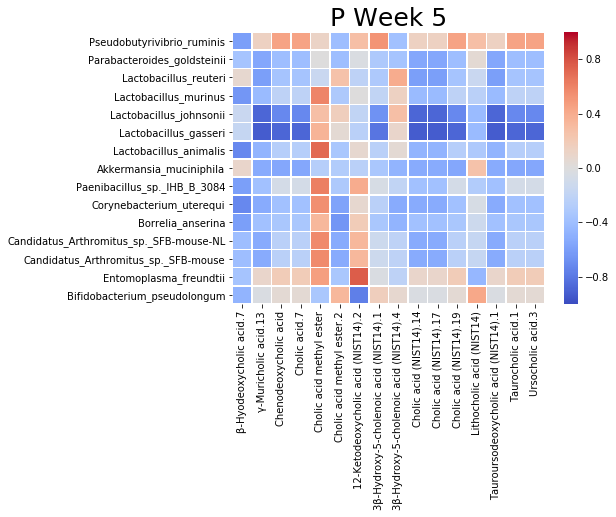

In [4]:
Placebo_T5 = pd.read_csv('clrT5_P.csv', index_col=0)
Placebo_T5_result=Placebo_T5.corr(method='spearman')
Placebo_T5_copy = Placebo_T5_result
Placebo_T5_copy=Placebo_T5_copy.tail(15)
Placebo_T5_copy=Placebo_T5_copy.iloc[:,0:16]
Placebo_T5_copy=Placebo_T5_copy.fillna(0)
fig1, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(Placebo_T5_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('P Week 5', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig1.savefig('clr_BA+WGS_T5_P.pdf', bbox_inches='tight', dpi=300)

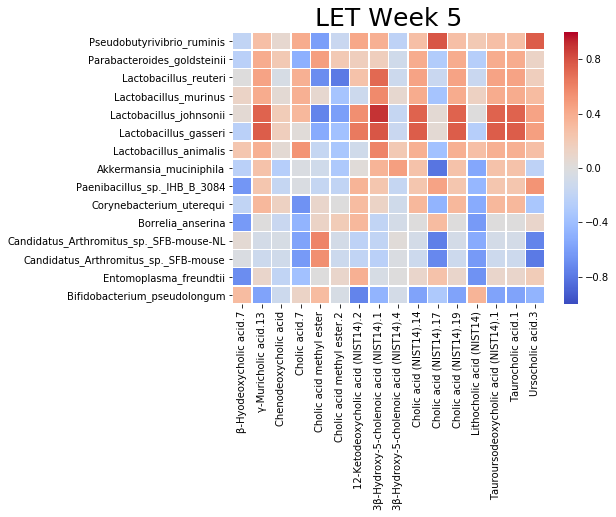

In [5]:
Let_T5 = pd.read_csv('clrT5_LET.csv', index_col=0)
Let_T5_result=Let_T5.corr(method='spearman')
Let_T5_copy = Let_T5_result
Let_T5_copy=Let_T5_copy.tail(15)
Let_T5_copy=Let_T5_copy.iloc[:,0:16]
Let_T5_copy=Let_T5_copy.fillna(0)
fig2, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(Let_T5_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('LET Week 5', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig2.savefig('clr_BA+WGS_T5_LET.pdf', bbox_inches='tight', dpi=300)

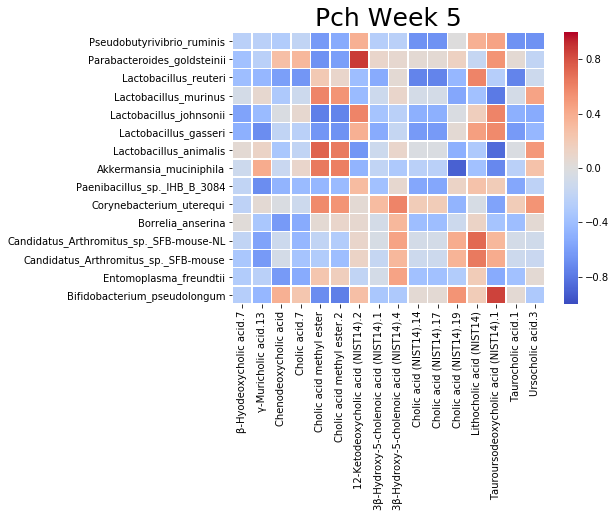

In [6]:
CoP_T5 = pd.read_csv('clrT5_Pch.csv', index_col=0)
CoP_T5_result=CoP_T5.corr(method='spearman')
CoP_T5_copy = CoP_T5_result
CoP_T5_copy=CoP_T5_copy.tail(15)
CoP_T5_copy=CoP_T5_copy.iloc[:,0:16]
CoP_T5_copy=CoP_T5_copy.fillna(0)
fig3, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(CoP_T5_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('Pch Week 5', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig3.savefig('clr_BA+WGS_T5_Pch.pdf', bbox_inches='tight', dpi=300)

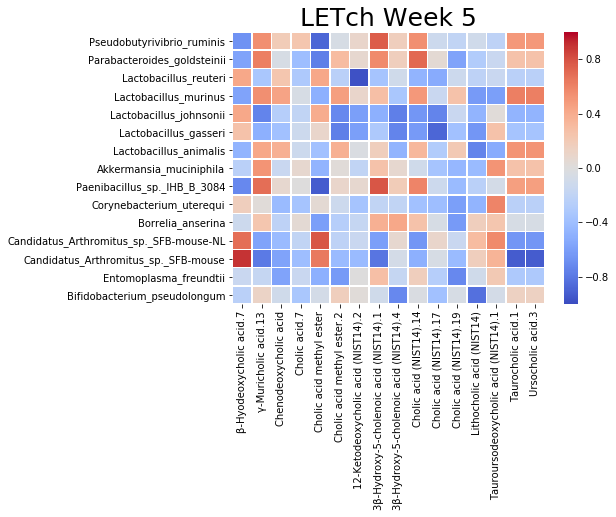

In [7]:
CoL_T5 = pd.read_csv('clrT5_LETch.csv', index_col=0)
CoL_T5_result=CoL_T5.corr(method='spearman')
CoL_T5_copy = CoL_T5_result
CoL_T5_copy=CoL_T5_copy.tail(15)
CoL_T5_copy=CoL_T5_copy.iloc[:,0:16]
CoL_T5_copy=CoL_T5_copy.fillna(0)
fig4, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(CoL_T5_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('LETch Week 5', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig4.savefig('clr_BA+WGS_T5_LETch.pdf', bbox_inches='tight', dpi=300)

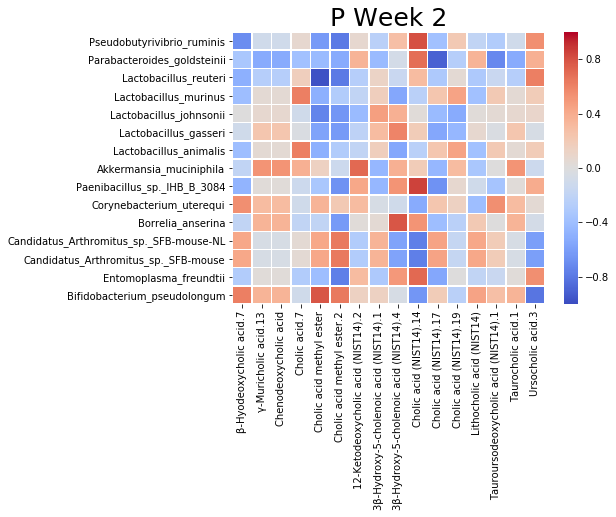

In [8]:
Placebo_T2 = pd.read_csv('clrT2_P.csv', index_col=0)
Placebo_T2_result=Placebo_T2.corr(method='spearman')
Placebo_T2_copy = Placebo_T2_result
Placebo_T2_copy=Placebo_T2_copy.tail(15)
Placebo_T2_copy=Placebo_T2_copy.iloc[:,0:16]
Placebo_T2_copy=Placebo_T2_copy.fillna(0)
fig5, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(Placebo_T2_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('P Week 2', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig5.savefig('clr_BA+WGS_T2_Placebo.pdf', bbox_inches='tight', dpi=300)

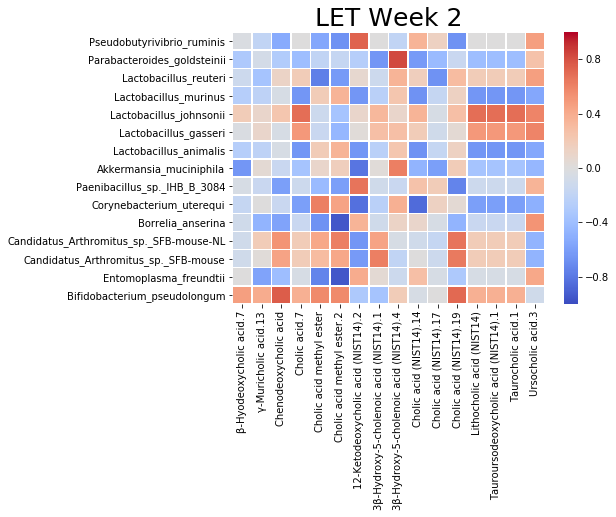

In [9]:
Let_T2 = pd.read_csv('clrT2_LET.csv', index_col=0)
Let_T2_result=Let_T2.corr(method='spearman')
Let_T2_copy = Let_T2_result
Let_T2_copy=Let_T2_copy.tail(15)
Let_T2_copy=Let_T2_copy.iloc[:,0:16]
Let_T2_copy=Let_T2_copy.fillna(0)
fig6, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(Let_T2_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('LET Week 2', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig6.savefig('clr_BA+WGS_T2_LET.pdf', bbox_inches='tight', dpi=300)

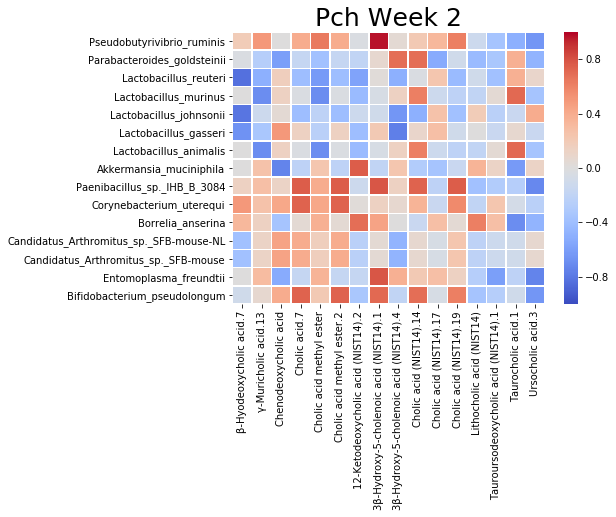

In [10]:
CoP_T2 = pd.read_csv('clrT2_Pch.csv', index_col=0)
CoP_T2_result=CoP_T2.corr(method='spearman')
CoP_T2_copy = CoP_T2_result
CoP_T2_copy=CoP_T2_copy.tail(15)
CoP_T2_copy=CoP_T2_copy.iloc[:,0:16]
CoP_T2_copy=CoP_T2_copy.fillna(0)
fig7, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(CoP_T2_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('Pch Week 2', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig7.savefig('clr_BA+WGS_T2_Pch.pdf', bbox_inches='tight', dpi=300)

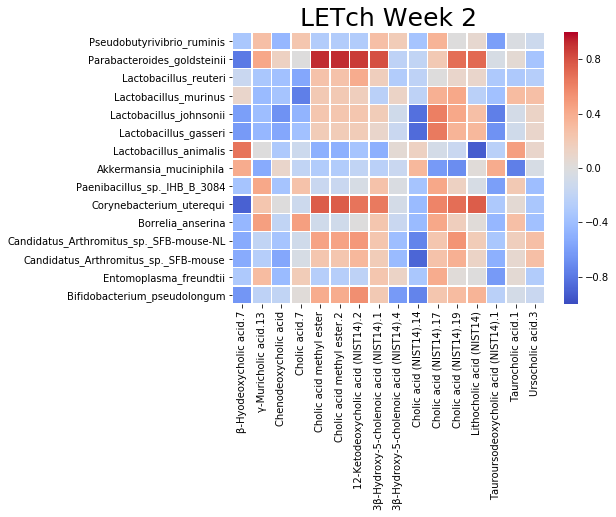

In [11]:
CoL_T2 = pd.read_csv('clrT2_LETch.csv', index_col=0)
CoL_T2_result=CoL_T2.corr(method='spearman')
CoL_T2_copy = CoL_T2_result
CoL_T2_copy=CoL_T2_copy.tail(15)
CoL_T2_copy=CoL_T2_copy.iloc[:,0:16]
CoL_T2_copy=CoL_T2_copy.fillna(0)
fig8, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(CoL_T2_copy, linewidths=.5, ax=ax, cmap="coolwarm", vmin=-1, vmax=1).set_title('LETch Week 2', fontsize=25)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
fig8.savefig('clr_BA+WGS_T2_LETch.pdf', bbox_inches='tight', dpi=300)